Read time series dataset and load each column as an array
Time-->t
Magnitude-->Y
Error-->e

In [83]:
import numpy as np
from numpy import *

# Load data
ts = np.loadtxt('w.dat', unpack = True)
#print(ts)
# Time(t) and magnitude(Y) and error(e)
t = ts[0]
Y = ts[1]
e = ts[2]
# Mean value, maximum value, minimum value of magnitude
v0 = np.mean(Y)
v_max = np.max(Y)
v_min = np.min(Y)
# max and min difference 
v_diff = v_max - v_min
# Average value of error
e_avg = np.mean(abs(e))

print("The first point magnitude is:", Y[0])
print("The mean value of the magnitude is:", v0)
print("The maximum value of the magnitude is:", v_max)
print("The minimum value of the magnitude is:", v_min)
print("The difference is:", v_diff)
print("Number of points is:", len(t))
print("Time length is from", t[0], "to", t[-1])
print("The average value of error is:", e_avg)
print("Max error:", max(e))
print("Min error:", min(e))

The first point magnitude is: 13.4949
The mean value of the magnitude is: 13.522750082699305
The maximum value of the magnitude is: 13.8964
The minimum value of the magnitude is: 13.4846
The difference is: 0.4117999999999995
Number of points is: 3023
Time length is from 0.2075936 to 0.5585228
The average value of error is: 0.004310750909692359
Max error: 0.0087
Min error: 0.0032


Plot observed time series (given data)

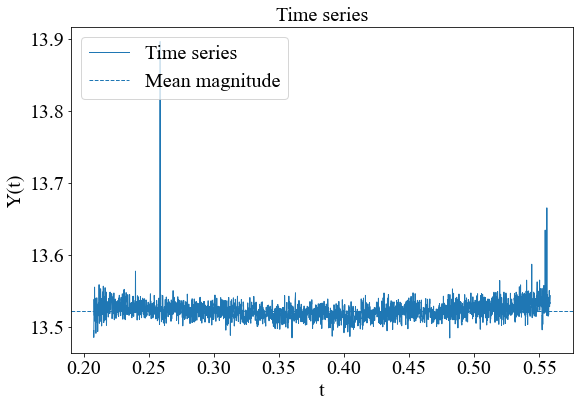

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
font1 = {"family" : "Times New Roman", "size" : 20}
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)

# Initiate plot object
plt.title('Time series', family='Times New Roman', fontsize=20)
plt.ylabel('Y(t)', family='Times New Roman', fontsize=20)
plt.xlabel('t', family='Times New Roman', fontsize=20)

# Plot observed data
# plt.xlim(0.20, 0.25)
plt.plot(t, Y, label = "Time series")
plt.axhline(y = v0, label = "Mean magnitude", linestyle = '--')

# Add legend
plt.legend(loc = 2, prop=font1)

Simulating Brownian motion sample path

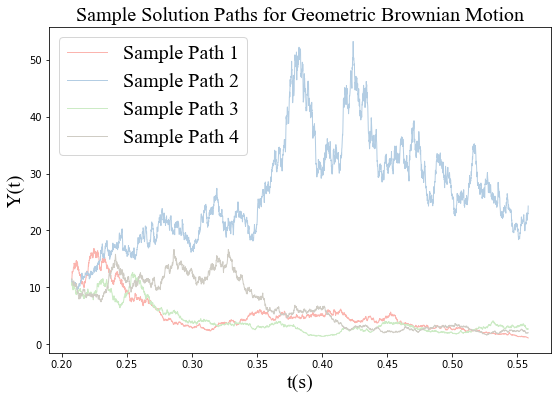

In [85]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]

# SDE model parameters
mu = 1
sigma = 2
# Magnitude of assumed initial point
y_bm_0 = 13.5

# Simulation parameters(T is time period, N is number of points, dt is time interval)
T = t[-1] - t[0]
N = len(t)
dt = T/N
# Array of time points
t_bm = np.arange(t[0], t[-1], dt)
# print(dt)
# print(t_bm[0])
# print(t_bm[-1])

# Initiate plot object
plt.title('Sample Solution Paths for Geometric Brownian Motion', size=20, family='Times New Roman')
plt.ylabel('Y(t)', size=20, family='Times New Roman')
plt.xlabel('t(s)', size=20, family='Times New Roman')

# Create and plot sample paths
for i in range(len(pal)):
    # Create Brownian Motion
    np.random.seed(i)
    dB = np.sqrt(dt) * np.random.randn(N)
    B  = np.cumsum(dB)
    
    # Compute exact solution
    y_bm = y_bm_0 * np.exp((mu - 0.5 * sigma**2) * t_bm + sigma * B)
    
    # Add line to plot
    plt.plot(t_bm, y_bm, label = "Sample Path " + str(i+1), color=pal[i])

# Add legend
plt.legend(loc = 2, prop=font1)

A suitable starting value for mu is half the difference between the maximum and minimum signal in the dataset. 
As for sigma, take an average value for the error which is the third column in the dataset.

Applying Euler-Maruyama Method

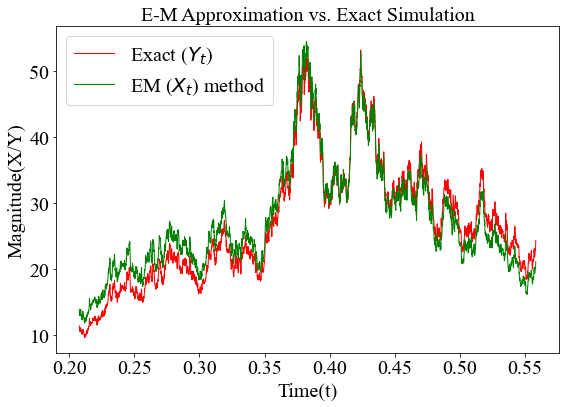

In [86]:
import math

# # Assume value of amplitude, omega and Phi
amp = (np.max(Y)-np.min(Y))/2
omega = (2 * math.pi) / (150./3600./24.)
# print(omega)
phi = 0

# Create Brownian Motion
np.random.seed(1)
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)

# Exact Solution
y_bm = y_bm_0 * np.exp((mu - 0.5 * sigma**2) * t_bm + (sigma * B))

# EM Approximatiom
# Define y_em as approximate value
y_em = []
# Define a intial point value for SDE approximation
X = y_bm_0
for j in range(N):
    X += amp * omega * math.cos(omega*t_bm[j] + phi) * dt + sigma*X*dB[j]
    y_em.append(X)            

# Plot
plt.title('E-M Approximation vs. Exact Simulation', family='Times New Roman', fontsize=20)
plt.xlabel('Time(t)', family='Times New Roman', fontsize=20)
plt.ylabel('Magnitude(X/Y)', family='Times New Roman', fontsize=20)
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)
plt.plot(t_bm, y_bm, label="Exact ($Y_t$)", color='red')
plt.plot(t_bm, y_em, label="EM ($X_t$) method", color='green')
plt.legend(loc = 2, prop=font1)

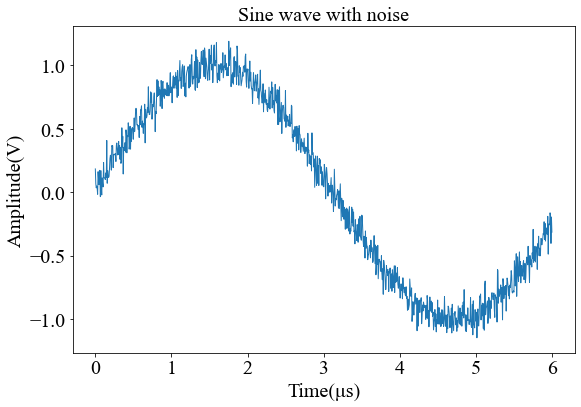

In [87]:
# Plot sine wave with noise
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,6,1000)
noise=np.random.normal(0,0.08,1000)
y1=np.sin(x)+noise
plt.plot(x,y1)
plt.xlabel("Time(μs)", size=20, family='Times New Roman')
plt.ylabel("Amplitude(V)", size=20, family='Times New Roman')
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)
plt.title("Sine wave with noise", size=20, family='Times New Roman')
plt.show()

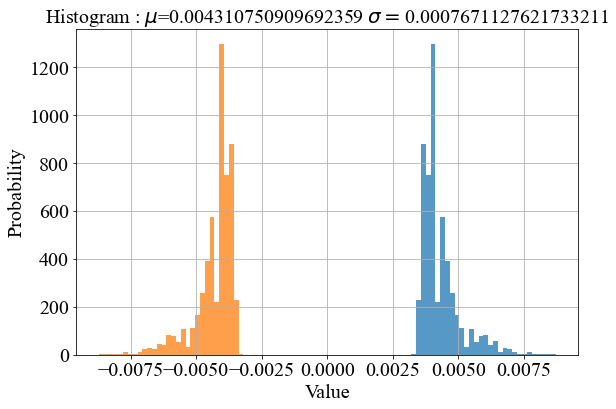

In [88]:
# Fit a Gaussian distribution
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
from scipy.stats import norm
 
# Converting oberved positive datasets into negative one
e_neg = [ -x for x in e]

x = np.array(e)
mu =np.mean(x) # Calculate mean
sigma =np.std(x) 
num_bins = 30 # Number of bins
# Positive part
n, bins, patches = plt.hist(x, num_bins,density=1, alpha=0.75)
# Negative part
n1, bins1, patches1 = plt.hist(e_neg, num_bins,density=1, alpha=0.75)
# Fit a best Gaussian distribution for negative and positive part
y = norm.pdf(bins, mu, sigma)
y1 = norm.pdf(bins1, -mu, sigma)

# Connecting postive and negative Gaussian
x3 = [-min(bins), min(bins)]
y3 = [0, 0]
x4 = [[-min(bins), -min(bins)], [min(bins), min(bins)]]
y4 = [[y[0], 0], [y[0], 0]]
 
plt.grid(True)
# plt.xlim(-max(e), max(e))
# plt.plot(bins, y, 'r')
# plt.plot(bins1, y1, 'r')
plt.xlabel('Value', size=20, family='Times New Roman')
plt.ylabel('Probability', size=20, family='Times New Roman')
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)
plt.title('Histogram : $\mu$=' + str(mu) + ' $\sigma=$'+ str(sigma), size=20, family='Times New Roman')
plt.show()


Text(0.5, 1.0, 'Designed Gaussian distribution with two peaks')

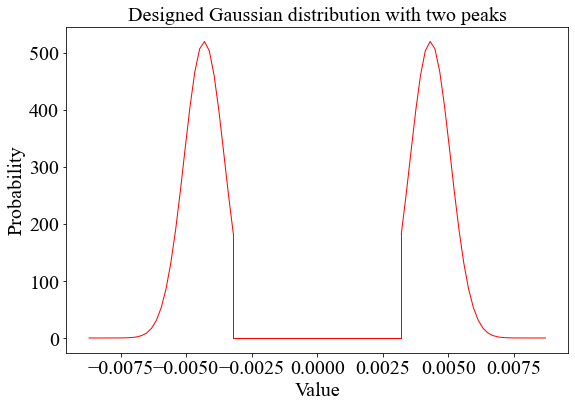

In [89]:
# Plot Gaussian curve in positive
plt.plot(bins, y, 'r') 
# Plot Gaussian curve in negative
plt.plot(bins1, y1, 'r')
# Connecting negtive part and positive part into one Gaussian curve with two peaks
plt.plot(x3, y3, 'r')
for i in range(len(x4)):
    plt.plot(x4[i], y4[i], color='r')
plt.xlabel('Value', size=20, family='Times New Roman') 
plt.ylabel('Probability', size=20, family='Times New Roman') 
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)
plt.title('Designed Gaussian distribution with two peaks', size=20, family='Times New Roman')

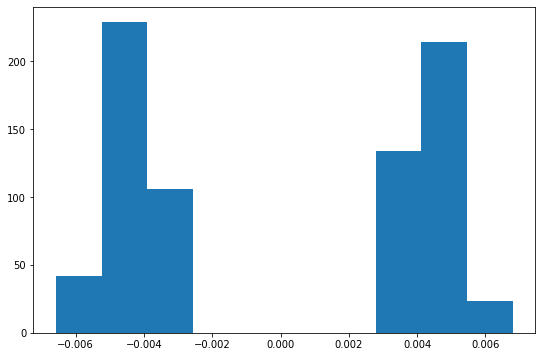

In [90]:
import scipy.stats as stats

N = len(t)
# Generate random number 
lower, upper = 0.003, 0.009
mu, sigma = 0.004310750909692359, 0.0007671127621733211
# rdm represent normal distribution with max and min limitation
rdm = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
dB = rdm.rvs(N)

# Converted into random positive and random negative
dB_n = []
for item in dB:
    new = item *random.choice((1,-1))
    dB_n.append(new) 

plt.hist(dB_n, density=True)
plt.show()